# [Sckikit-learn](https://scikit-learn.org/stable/)

## 자주 사용하는 사이킷런 모듈

- 데이터 정제(Data Cleansing) & 속성 공학(Feature Engineering)
  - sklearn.preprocessing: 데이터 전처리(인코딩, 정규화 등)
  - sklearn.feature_selection: 특성 선택
  - sklearn.feature_extraction: 특성 추출(아미지나 텍스트에서 속성 추출)
- 모델 성능 평가와 개선
  - sklearn.model_selection: 데이터 분리, 하이퍼 파라미터 튜닝
  - sklearn.metrics: 성능평가
- 지도학습(Supervised Learning)
  - sklearn.ensemble: 앙상블
  - sklearn.linear_model: 선형모델
  - sklearn.tree: 의사결정나무
- 비지도학습(Unsupervised Learning)
  - sklearn.cluster: 군집분석
  - sklearn.decomposition: 차원축소
- 유틸리티와 데이터 세트
  - sklearn.pipeline: 워크플로우 파이프라인
  - 예제 데이터 세트
- 사이킷런 알고리즘 명명규칙
  - 분류 알고리즘명: OOClassifier
  > ex) DecisionTreeClassifier
  - 회귀 알고리즘명: OORegressor
  > ex) DecisionTreeRegressor

# 머신러닝 워크플로우

## Global Variables

In [1]:
import easydict
args = easydict.EasyDict() # easydict 선언

# args에 변수를 추가하는 코드
args.SEED = 10 # SEED 키 -> 10 벨류
args.target_col = 'target' # target_col 키 -> 'target' 벨류

In [2]:
args.SEED # 벨류인 10 리턴

10

In [3]:
args.target_col

'target'

## 데이터 수집(또는 데이터 로드)
- 유방암 데이터
> 총 30개의 속성과 malignant(악성), benign(양성)의 두가지 타겟값을 가지고 있다.

In [4]:
from sklearn.datasets import load_breast_cancer

# 데이터 로드
breast_cancer = load_breast_cancer()

In [5]:
dir(breast_cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## 학습용/검증용 데이터 분리

In [9]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [10]:
df_cancer = pd.DataFrame(breast_cancer.data, columns= breast_cancer.feature_names)
# df_cancer[args.target_col] = breast_cancer[args.target_col]

print(df_cancer.shape)

(569, 30)


In [11]:
df_cancer.head() # 앞에 5개의 데이터만 조회

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
args.target_col # 타겟 컬럼

'target'

In [13]:
breast_cancer[args.target_col][:5] # 1: True / 0: False

array([0, 0, 0, 0, 0])

In [14]:
# (569, 30) -> (row, column(features))

# pd.dataframe[컬럼명] = 데이터
df_cancer[args.target_col] = breast_cancer[args.target_col]
df_cancer.shape # (569, 31) -> (row, column(features, target))

(569, 31)

In [15]:
df_cancer.tail() # (569, 31)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [24]:
# train_test_split
train, test = train_test_split(df_cancer, random_state=args.SEED)

train.shape, test.shape

((426, 31), (143, 31))

## 데이터 점검 및 탐색
- test 데이터는 탐색하지 않음!!

In [25]:
train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
327,12.030,17.93,76.09,446.0,0.07683,0.03892,0.001546,0.005592,0.1382,0.06070,...,22.25,82.74,523.4,0.1013,0.07390,0.007732,0.02796,0.2171,0.07037,1
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.010840,0.012900,0.2743,0.06960,...,17.45,69.86,368.6,0.1275,0.09866,0.021680,0.02579,0.3557,0.08020,1
260,20.310,27.06,132.90,1288.0,0.10000,0.10880,0.151900,0.093330,0.1814,0.05572,...,39.16,162.30,1844.0,0.1522,0.29450,0.378800,0.16970,0.3151,0.07999,0
504,9.268,12.87,61.49,248.7,0.16340,0.22390,0.097300,0.052520,0.2378,0.09502,...,16.38,69.05,300.2,0.1902,0.34410,0.209900,0.10250,0.3038,0.12520,1
544,13.870,20.70,89.77,584.8,0.09578,0.10180,0.036880,0.023690,0.1620,0.06688,...,24.75,99.17,688.6,0.1264,0.20370,0.137700,0.06845,0.2249,0.08492,1


In [18]:
train.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
369,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,0.06140,...,25.80,195.00,2227.0,0.1294,0.3885,0.47560,0.24320,0.2741,0.08574,0
320,10.25,16.18,66.52,324.2,0.10610,0.11110,0.06726,0.03965,0.1743,0.07279,...,20.61,71.53,390.4,0.1402,0.2360,0.18980,0.09744,0.2608,0.09702,1
527,12.34,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,0.05808,...,19.27,87.22,564.9,0.1292,0.2074,0.17910,0.10700,0.3110,0.07592,1
125,13.85,17.21,88.44,588.7,0.08785,0.06136,0.01420,0.01141,0.1614,0.05890,...,23.58,100.30,725.9,0.1157,0.1350,0.08115,0.05104,0.2364,0.07182,1
265,20.73,31.12,135.70,1419.0,0.09469,0.11430,0.13670,0.08646,0.1769,0.05674,...,47.16,214.00,3432.0,0.1401,0.2644,0.34420,0.16590,0.2868,0.08218,0


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426 entries, 327 to 265
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              426 non-null    float64
 1   mean texture             426 non-null    float64
 2   mean perimeter           426 non-null    float64
 3   mean area                426 non-null    float64
 4   mean smoothness          426 non-null    float64
 5   mean compactness         426 non-null    float64
 6   mean concavity           426 non-null    float64
 7   mean concave points      426 non-null    float64
 8   mean symmetry            426 non-null    float64
 9   mean fractal dimension   426 non-null    float64
 10  radius error             426 non-null    float64
 11  texture error            426 non-null    float64
 12  perimeter error          426 non-null    float64
 13  area error               426 non-null    float64
 14  smoothness error         426 

In [20]:
train.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,14.196113,19.238333,92.488685,662.178169,0.096920,0.106123,0.090264,0.049943,0.181295,0.062892,...,25.595587,108.029202,889.201174,0.132812,0.256994,0.273514,0.115452,0.289543,0.084016,0.624413
std,3.590007,4.277144,24.789785,362.171622,0.014032,0.052365,0.079837,0.039327,0.026726,0.007060,...,6.022037,34.032580,576.120814,0.021648,0.154060,0.205443,0.065061,0.058617,0.017891,0.484843
min,6.981000,10.380000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.490000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.710000,16.187500,75.180000,420.350000,0.086995,0.066883,0.030385,0.020790,0.163200,0.058237,...,21.382500,84.122500,516.425000,0.119050,0.151625,0.122700,0.065320,0.250525,0.072350,0.000000
50%,13.415000,18.770000,86.965000,552.950000,0.096865,0.096790,0.065830,0.035000,0.179250,0.061790,...,25.265000,98.135000,691.500000,0.131900,0.217000,0.230050,0.101950,0.282400,0.080245,1.000000
75%,15.832500,21.587500,104.025000,790.575000,0.105375,0.130575,0.133200,0.073940,0.196125,0.066210,...,29.372500,126.200000,1065.000000,0.146000,0.336100,0.385300,0.161150,0.317275,0.092067,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.311400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.209800,1.058000,1.170000,0.291000,0.663800,0.207500,1.000000


## 전처리 및 정제

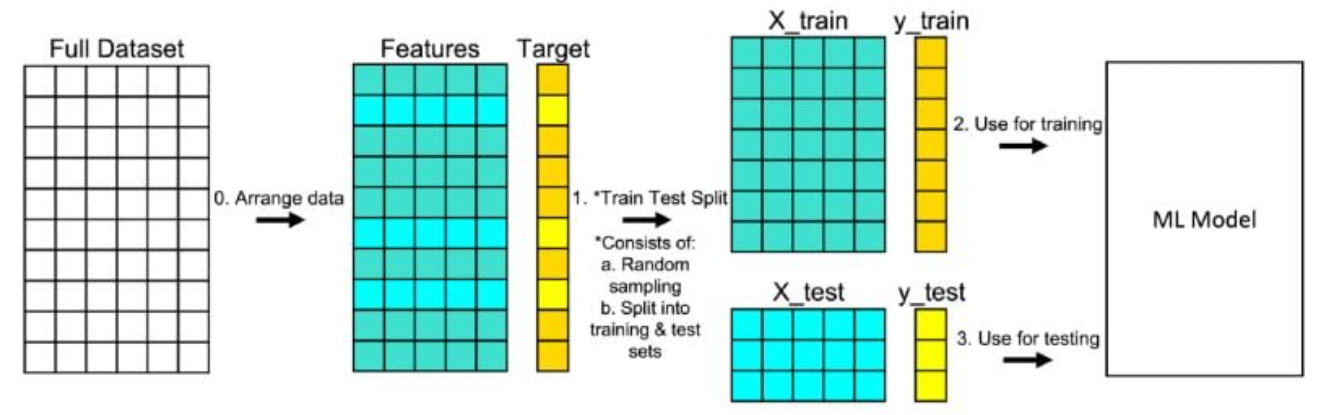

In [21]:
# featuers, target 분리!!
x_train, x_test = train.drop(args.target_col, axis=1), test.drop(args.target_col, axis=1)
y_train, y_test = train[args.target_col], test[args.target_col]

In [26]:
x_train.shape, y_train.shape

((426, 30), (426,))

In [27]:
x_test.shape, y_test.shape

((143, 30), (143,))

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
# standardization
scaler = StandardScaler()

train_scaled = scaler.fit_transform(x_train)
test_scaled = scaler.transform(x_test)

In [31]:
print(f'x_train.shape: {x_train.shape}')
print('-'*50)
print(f'train_scaled.shape: {train_scaled.shape}')

x_train.shape: (426, 30)
--------------------------------------------------
train_scaled.shape: (426, 30)


In [32]:
train_scaled[:1,:]

array([[-0.60408221, -0.30624914, -0.66228757, -0.59759609, -1.43340425,
        -1.28487074, -1.11254551, -1.12909991, -1.61436823, -0.31081757,
        -0.62155456, -0.5783191 , -0.6928    , -0.50501258, -0.76703944,
        -1.07161825, -1.2493379 , -1.30374665, -0.74688387, -0.81051627,
        -0.67577053, -0.55621057, -0.74396171, -0.63568485, -1.45739321,
        -1.18985953, -1.29522303, -1.34634798, -1.23731664, -0.76362748]])

## 모델링 및 훈련

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
# logistic regression
lr_clf = LogisticRegression()

# 훈련
lr_clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 평가

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
# 예측
pred = lr_clf.predict(x_test)


# 정확도 측정
accuracy_score(y_test, pred)

0.9300699300699301